In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END

In [12]:
#Create State Schema
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber1: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [16]:
def adder_one(state: AgentState) -> AgentState:
    """This node adds two numbers"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor_one(state: AgentState) -> AgentState:
    """This node subtracts two numbers"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def decide_next_node_one(state:AgentState) -> AgentState:
    """This node decides which operation to perform"""
    if state["operation1"] == "+":
        return "addition_operation_one"
    elif state["operation1"] == "-":
        return "subtraction_operation_one"
    
def adder_two(state: AgentState) -> AgentState:
    """This node adds two numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor_two (state: AgentState) -> AgentState:
    """This node subtracts two numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node_two(state: AgentState) -> AgentState:
    """"This node decides which operation to perform"""
    if state["operation2"] == "+":
        return "addition_operation_two"
    elif state["operation2"] == "-":
        return "subtraction_operation_two"


In [28]:
graph = StateGraph(AgentState)


graph.add_node("add_node1", adder_one)
graph.add_node("subtractor_node1", subtractor_one)
graph.add_node("router1", lambda state:state)

graph.add_node("add_node2", adder_two)
graph.add_node("subtractor_node2", subtractor_two)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node_one,

    {
        #Edge name: Node name
        "addition_operation_one": "add_node1",
        "subtraction_operation_one": "subtractor_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtractor_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node_two,

    {
        #Edge name: Node name
        "addition_operation_two": "add_node2",
        "subtraction_operation_two": "subtractor_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtractor_node2", END)


app = graph.compile()






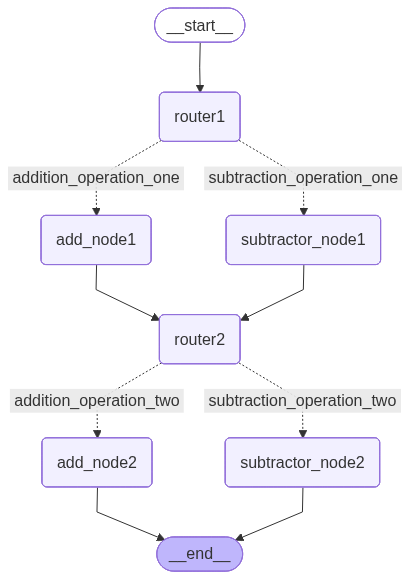

5 9


In [39]:
#Visualize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


initial_state_1 = AgentState(number1 = 10, operation1="-", number2=5, number3=7, operation2="+", number4=2)
result = app.invoke(initial_state_1)
print(result["finalNumber1"], result["finalNumber2"])